In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('customers.csv')
offers = pd.read_csv('offers.csv')
data_dict = pd.read_csv('data_dictionary.csv')
event_dict = pd.read_csv('events.csv')

In [3]:
print("Customers Data:\n", customers.head())
print("Offers Data:\n", offers.head())
print("Data Dictionary:\n", data_dict.head())
try:
    print("\nEvents Data:\n", events.head())
except NameError:
    print("\nThe 'events' DataFrame is not defined. Please make sure you have loaded it correctly.")

Customers Data:
                         customer_id  became_member_on gender  age    income
0  68be06ca386d4c31939f3a4f0e3dd783          20170212    NaN  118       NaN
1  0610b486422d4921ae7d2bf64640c50b          20170715      F   55  112000.0
2  38fe809add3b4fcf9315a9694bb96ff5          20180712    NaN  118       NaN
3  78afa995795e4d85b5d9ceeca43f5fef          20170509      F   75  100000.0
4  a03223e636434f42ac4c3df47e8bac43          20170804    NaN  118       NaN
Offers Data:
                            offer_id     offer_type  difficulty  reward  \
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo          10      10   
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo          10      10   
2  3f207df678b143eea3cee63160fa8bed  informational           0       0   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo           5       5   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount          20       5   

   duration                              channels  
0         7     

In [4]:
# Checking missing values
print("Missing Values in Customers:\n", customers.isnull().sum())
print("Missing Values in Offers:\n", offers.isnull().sum())

Missing Values in Customers:
 customer_id            0
became_member_on       0
gender              2175
age                    0
income              2175
dtype: int64
Missing Values in Offers:
 offer_id      0
offer_type    0
difficulty    0
reward        0
duration      0
channels      0
dtype: int64


In [5]:
# Drop rows with too many missing values or fill them
customers.dropna(inplace=True)
offers.dropna(inplace=True)

In [6]:
# Convert dates if available
date_columns = ['Offer_Received_Date', 'Offer_Redeemed_Date']
for col in date_columns:
    if col in offers.columns:
        offers[col] = pd.to_datetime(offers[col], errors='coerce')

In [7]:
# Check datatypes and adjust if needed
print(customers.dtypes)
print(offers.dtypes)

customer_id          object
became_member_on      int64
gender               object
age                   int64
income              float64
dtype: object
offer_id      object
offer_type    object
difficulty     int64
reward         int64
duration       int64
channels      object
dtype: object


In [8]:
# Merge datasets for analysis
if 'Customer_ID' in customers.columns and 'Customer_ID' in offers.columns:
    df = pd.merge(offers, customers, on='Customer_ID', how='inner')
else:
    df = pd.concat([offers, customers], axis=1)

In [9]:
print(customers.columns)


Index(['customer_id', 'became_member_on', 'gender', 'age', 'income'], dtype='object')


In [10]:
# Strip whitespace and convert to proper case
customers.columns = customers.columns.str.strip().str.title()
print(customers.columns)


Index(['Customer_Id', 'Became_Member_On', 'Gender', 'Age', 'Income'], dtype='object')


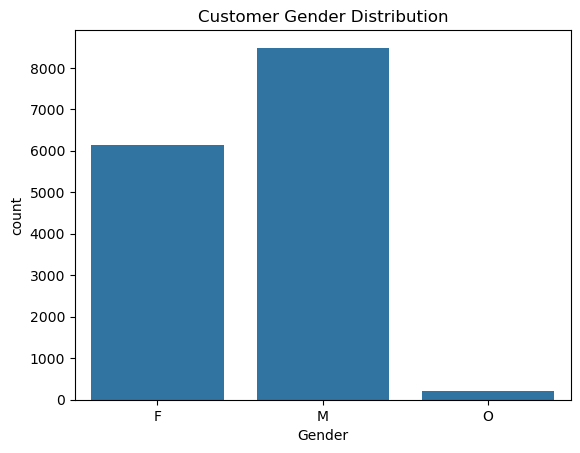

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', data=customers)
plt.title("Customer Gender Distribution")
plt.show()


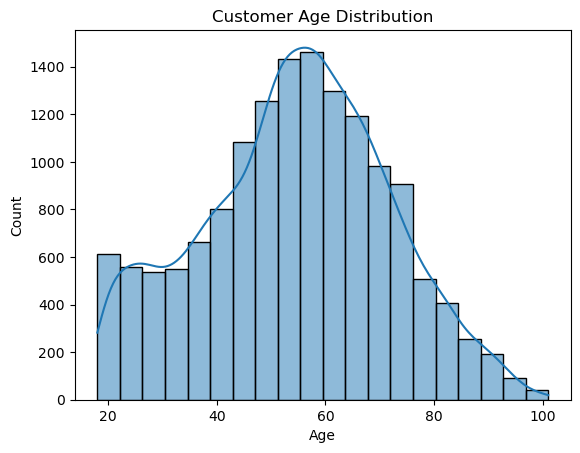

In [12]:
# Age distribution
sns.histplot(customers['Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.show()

In [13]:
print(offers.columns)


Index(['offer_id', 'offer_type', 'difficulty', 'reward', 'duration',
       'channels'],
      dtype='object')


In [14]:
offers.columns = offers.columns.str.strip().str.replace(" ", "_").str.title()
print(offers.columns)


Index(['Offer_Id', 'Offer_Type', 'Difficulty', 'Reward', 'Duration',
       'Channels'],
      dtype='object')


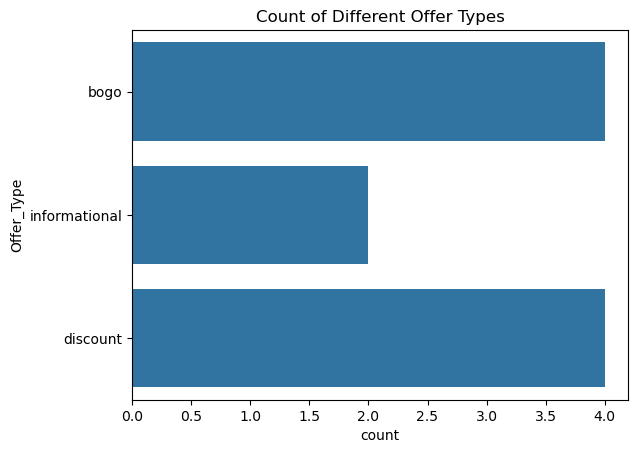

In [15]:
sns.countplot(y='Offer_Type', data=offers)
plt.title("Count of Different Offer Types")
plt.show()


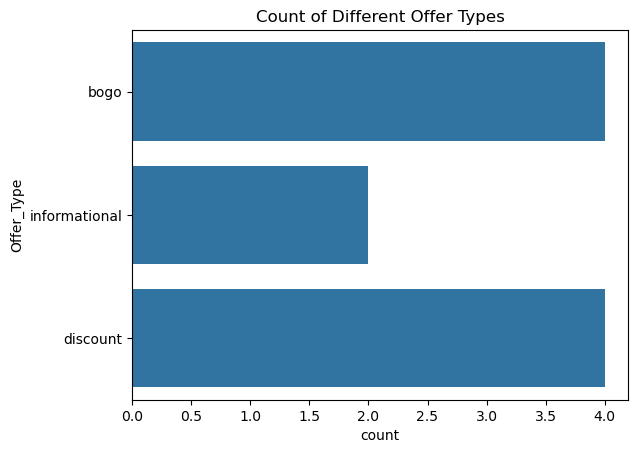

In [16]:
# Offer type count
sns.countplot(y='Offer_Type', data=offers)
plt.title("Count of Different Offer Types")
plt.show()


In [17]:
# Offers redeemed vs. not redeemed
if 'Is_Redeemed' in offers.columns:
    sns.countplot(x='Is_Redeemed', data=offers)
    plt.title("Offer Redemption Rate")
    plt.xticks([0, 1], ['Not Redeemed', 'Redeemed'])
    plt.show()

In [18]:
# Redemption rate by offer type
if 'Is_Redeemed' in offers.columns:
    redemption_rate = offers.groupby('Offer_Type')['Is_Redeemed'].mean().sort_values(ascending=False)
    redemption_rate.plot(kind='bar', title='Redemption Rate by Offer Type', color='skyblue')
    plt.ylabel("Redemption Rate")
    plt.show()

In [19]:
# Average income of customers who redeemed offers
if 'Income' in customers.columns and 'Is_Redeemed' in df.columns:
    sns.boxplot(x='Is_Redeemed', y='Income', data=df)
    plt.title("Income Distribution by Redemption Status")
    plt.xticks([0, 1], ['Not Redeemed', 'Redeemed'])
    plt.show()

In [20]:
print(df.columns.tolist())


['offer_id', 'offer_type', 'difficulty', 'reward', 'duration', 'channels', 'customer_id', 'became_member_on', 'gender', 'age', 'income']


In [21]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.title()
print(df.columns.tolist())  # Check again after cleaning


['Offer_Id', 'Offer_Type', 'Difficulty', 'Reward', 'Duration', 'Channels', 'Customer_Id', 'Became_Member_On', 'Gender', 'Age', 'Income']


In [22]:
print([col for col in df.columns if 'redeem' in col.lower()])


[]


In [23]:
print(df.columns.tolist())


['Offer_Id', 'Offer_Type', 'Difficulty', 'Reward', 'Duration', 'Channels', 'Customer_Id', 'Became_Member_On', 'Gender', 'Age', 'Income']


In [24]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.title()
print(df.columns.tolist())


['Offer_Id', 'Offer_Type', 'Difficulty', 'Reward', 'Duration', 'Channels', 'Customer_Id', 'Became_Member_On', 'Gender', 'Age', 'Income']


In [25]:
print([col for col in df.columns if 'redeem' in col.lower()])


[]


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean columns (optional)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.title()

# Ensure the correct column names exist
print(df.columns.tolist())  # Check this for 'Is_Redeemed' and 'Income'

['Offer_Id', 'Offer_Type', 'Difficulty', 'Reward', 'Duration', 'Channels', 'Customer_Id', 'Became_Member_On', 'Gender', 'Age', 'Income']


In [27]:
# Draw the boxplot
if 'Is_Redeemed' in df.columns and 'Income' in df.columns:
    sns.boxplot(x='Is_Redeemed', y='Income', data=df, palette='Set2')
    plt.title("Income Distribution by Redemption Status")
    plt.xticks([0, 1], ['Not Redeemed', 'Redeemed'])
    plt.xlabel("Redemption Status")
    plt.ylabel("Income")
    plt.tight_layout()
    plt.show()
else:
    print("Either 'Is_Redeemed' or 'Income' column not found in DataFrame.")

Either 'Is_Redeemed' or 'Income' column not found in DataFrame.


In [28]:
# Offer channel engagement
if 'Channel' in df.columns:
    sns.countplot(data=df[df['Is_Redeemed'] == 1], x='Channel', order=df['Channel'].value_counts().index)
    plt.title("Redemption Count by Offer Channel")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [29]:
# Redemption trend over time
if 'Offer_Redeemed_Date' in df.columns:
    df['Redeemed_Date'] = pd.to_datetime(df['Offer_Redeemed_Date'], errors='coerce')
    monthly_redeemed = df[df['Is_Redeemed'] == 1].set_index('Redeemed_Date').resample('M').size()
    monthly_redeemed.plot(title='Monthly Redemption Trend', marker='o', linestyle='--', color='green')
    plt.ylabel("Redemptions")
    plt.xlabel("Month")
    plt.tight_layout()
    plt.show()

In [30]:
print(df.columns.tolist())


['Offer_Id', 'Offer_Type', 'Difficulty', 'Reward', 'Duration', 'Channels', 'Customer_Id', 'Became_Member_On', 'Gender', 'Age', 'Income']


In [31]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.title()
print(df.columns.tolist())  # Recheck after cleaning


['Offer_Id', 'Offer_Type', 'Difficulty', 'Reward', 'Duration', 'Channels', 'Customer_Id', 'Became_Member_On', 'Gender', 'Age', 'Income']


In [66]:
# Save for Power BI / Tableau
df.to_csv('cleaned_dashboard_data.csv', index=False)